In [1]:
exec(open("inc_notebook.py").read())

current working dirF:\myProjects\tfKeras\UCSC\CMPS242\earthquake


In [2]:
import logging, sys, math,os
exec(open("estimator/initKeras.py").read())

Using TensorFlow backend.


In [3]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="darkgrid")

if sys.modules.get( 'library.LivePlotKeras', False ) != False :
    del sys.modules['library.LivePlotKeras'] 
if sys.modules.get( 'LivePlotKeras', False ) != False :
    del sys.modules['LivePlotKeras'] 
from library.LivePlotKeras import *

logging.warning( "LivePlotKeras loaded" )

livePlotKeras = LivePlotKeras()

In [4]:
from embedding.MultipleBinEmbeddingType import *

if sys.modules.get( 'library.MultipleBinDataGenerator', False ) != False :
    del sys.modules['library.MultipleBinDataGenerator'] 
if sys.modules.get( 'MultipleBinDataGenerator', False ) != False :
    del sys.modules['MultipleBinDataGenerator'] 
from library.MultipleBinDataGenerator import *

logging.warning( "MultipleBinDataGenerator loaded" )

trainGenerator = MultipleBinDataGenerator(embedding=MultipleBinEmbeddingType.CNN_STATS, 
                                          batch_size=16, windowSize = 36, stride = 6)

D:\ProgramData\Anaconda3\envs\tf\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator RobustScaler from version 0.20.2 when using version 0.20.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [5]:

model_input = layers.Input( shape = ( 36, 275, 1 ) )
x = layers.Conv2D(64, 
        kernel_size = (5,1), 
        padding = 'same'
        )(model_input)

x = layers.LeakyReLU(alpha=0.1)(x)

x = layers.Conv2D(128, kernel_size=(3,1), padding='same')(x)
x = layers.LeakyReLU(alpha=0.1)(x)
x = layers.Dropout(0.2)(x)

x = layers.Conv2D(16, kernel_size=(3,1), activation=activations.relu, padding='same')(x)
x = layers.Flatten()(x)
x = layers.Dense(1)(x)

model = models.Model(model_input, x, name = "TinyCNN")
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 36, 275, 1)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 36, 275, 64)       384       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 36, 275, 64)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 36, 275, 128)      24704     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 36, 275, 128)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 36, 275, 128)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 36, 275, 16)       6160      
__________

In [6]:
model.compile(optimizer=optimizers.Adam(lr=0.001),
             loss = losses.MSE,
             metrics = [metrics.MSE, metrics.MAE])

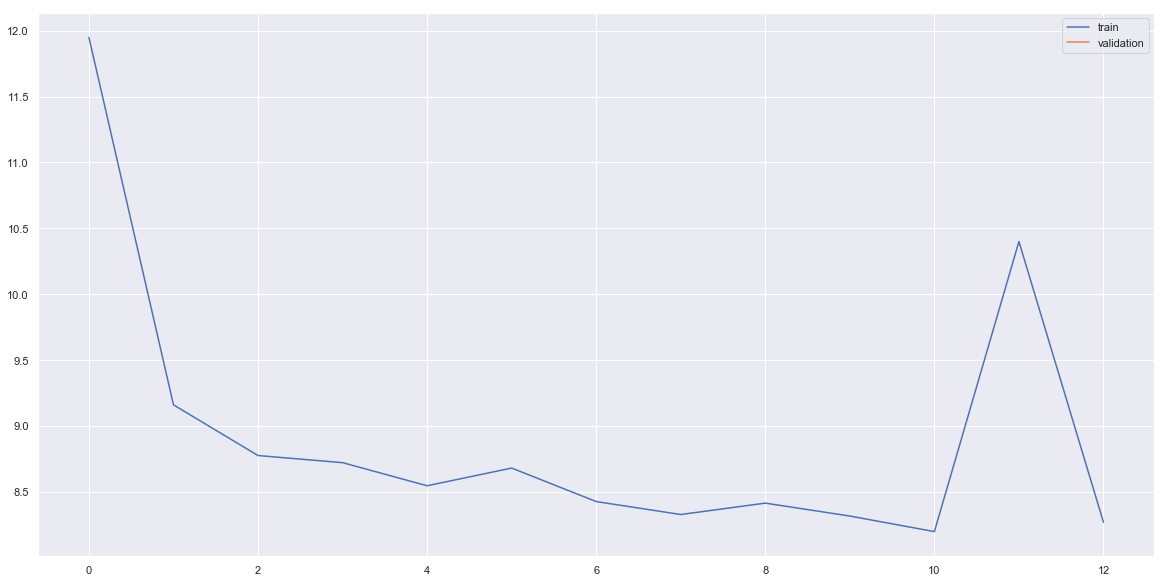

Epoch 14/30
 289/1599 [====>.........................] - ETA: 1:22 - loss: 7.9626 - mean_squared_error: 7.9626 - mean_absolute_error: 2.2004

In [ ]:
history = model.fit_generator( generator=trainGenerator,
                    use_multiprocessing=False, 
                    workers=3, 
                    initial_epoch = 0,
                    epochs=30,
                    max_q_size = 100,
                    steps_per_epoch = trainGenerator.getNumberOfBatches(),
                    callbacks = [livePlotKeras]
                   )